#**Python-Sentiment-Analysis-Hugging Face**
###Created by @Anna-portfolio

Natural Language Processing (NLP) project in `Python` for creating sentiment analysis classifier of Hugging Face > Rotten Tomatoes reviews (naive Bayes classifier using scikit-learn, spaCy, Matplotlib)<br><br>
Dataset source: https://huggingface.co/datasets/stanfordnlp/imdb

In [1]:
! pip install datasets
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

##Preparing Data

In [2]:
# load dataset
data = load_dataset('rotten_tomatoes')

# convert to df object
df = data["train"].to_pandas()
display(df)
print(df.count())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
8525,any enjoyment will be hinge from a personal th...,0
8526,if legendary shlockmeister ed wood had ever ma...,0
8527,hardly a nuanced portrait of a young woman's b...,0
8528,"interminably bleak , to say nothing of boring .",0


text     8530
label    8530
dtype: int64


In [3]:
#identify missing values

#find the total of missing values per column
df.isna().sum()

#output: 0, meanining: there are no missing values in dataframe

,0
text,0
label,0


In [4]:
#duplicates check

#duplicates check (ignoring the 1st row)
df.duplicated()

#output: False, meanining: there are no duplicates in dataframe

,0
0,False
1,False
2,False
3,False
4,False
...,...
8525,False
8526,False
8527,False
8528,False


##Cleaning Data

In [5]:
# spaCy (English)
!python -m spacy download en_core_web_sm
import spacy
spacy_en = spacy.load("en_core_web_sm")


# load stop words list
stopwords = spacy_en.Defaults.stop_words

# function for cleaning text
def clean_text(text):
    regex = r"[.!?/\\-_*:',()#@#$%^]"
    text = text.lower()
    text = re.sub(regex, " ", text)
    text = text.replace("  ", " ")
    return text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##Tokenization and Lemmatization

In [6]:
# Function to tokenize text (lemma + stopwords)
def tokenize_text(text):
    tokens = spacy_en(text)
    result = []
    for token in tokens:
        lemma = token.lemma_
        if lemma not in stopwords:
            result.append(lemma)
    return result


# data cleaning using apply()
df["text"] = df["text"].apply(clean_text)
display(df.head())

,text,label
0,the rock is destined to be the 21st century s ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,emerges as something rare an issue movie that...,1


##VECTORIZER

In [7]:
count_vectorize = CountVectorizer(tokenizer=tokenize_text)

vectors = count_vectorize.fit_transform(df["text"])
vectors.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(8530, 13491)

##TRAIN_TEST_SPLIT

In [8]:
print(type(vectors))
vectors.shape
X = vectors

# change the sentiment labels
y = df["label"].values

# split dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# print length of each of the dataset
print("Dataset split into train and validation (90% / 10%)")
print(X_train.shape[0])
print(y_train.shape[0])
print(X_valid.shape[0])
print(y_valid.shape[0])

<class 'scipy.sparse._csr.csr_matrix'>
Dataset split into train and validation (90% / 10%)
7677
7677
853
853


##Dataset Visualization




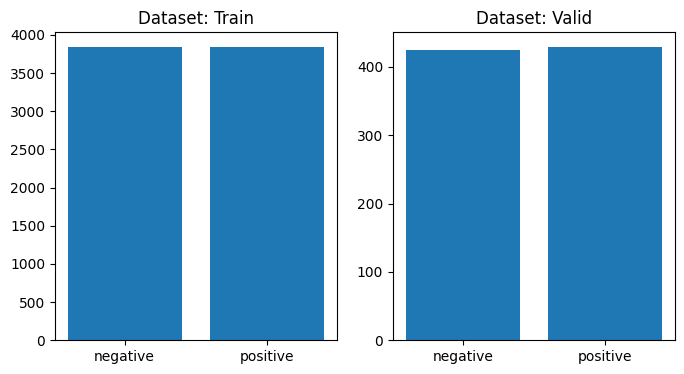

In [9]:
names = ['negative', 'positive']

# set figure 8 by 4
plt.figure(figsize=(8, 4))

# Train
ax = plt.subplot(1, 2, 1)
negative = (y_train == 0).sum()
positive = (y_train == 1).sum()
ax.set_title('Dataset: Train')
plt.bar(names, [negative, positive])


# Valid
ax2 = plt.subplot(1, 2, 2)
negative = (y_valid == 0).sum()
positive = (y_valid == 1).sum()
ax2.set_title('Dataset: Valid')
plt.bar(names, [negative, positive])

plt.show()

##Naive Bayes classifier (scikit-learn)

In [10]:
# create Naive Bayes model
nb = MultinomialNB()

nb.fit(X_train, y_train)
nb.score(X_valid, y_valid)

0.772567409144197

##Prediction

In [11]:
# get prediction for the whole dataset
y_pred = nb.predict(X_valid)

# total of correct predictions
correct = (y_valid == y_pred).sum()
print(f"Recognized {correct}/{X_valid.shape[0]}")
print(f"{correct/X_valid.shape[0] * 100}%")

# process of recognizing an unprocessed text
text = "One of the best movies I've ever seen!"
print(text)
text = clean_text(text)
vector = count_vectorize.transform([text])


Recognized 659/853
77.2567409144197%
One of the best movies I've ever seen!
